<a href="https://colab.research.google.com/github/andradhf/Public-Narrative-Analysis-of-Flood-Disasters/blob/main/Data_Analysis_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_community replicate -U langchain langchain-community langchain-experimental nltk
import pandas as pd
from langchain_community.llms import Replicate
from google.colab import userdata
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil token dari colab
api_token = userdata.get("api_token")

# Masukin token ke env variable
os.environ["REPLICATE_API_TOKEN"] = api_token

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('/content/Data_Sentimen_bencana (1).csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1942372111185781185,Mon Jul 07 23:56:13 +0000 2025,0,Nah kalo lagi banjir dimana2 gini yang pada ba...,1942372111185781185,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194237211118578...,373855358,NaN
1,1942355409815363831,Mon Jul 07 23:56:09 +0000 2025,0,@Giaa_JKT48 Kena banjir lagi dek?,1942372094077239418,NaN,Giaa_JKT48,in,NaN,0,0,0,https://x.com/undefined/status/194237209407723...,592421163,NaN
2,1942372089509601736,Mon Jul 07 23:56:08 +0000 2025,0,Huaaa Baru dapat kabar katanya Pamulang sekara...,1942372089509601736,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194237208950960...,1873027722685079552,NaN
3,1942372064880648566,Mon Jul 07 23:56:02 +0000 2025,3,Suka yang pink atau item mas.... Buat aku Banj...,1942372064880648566,https://pbs.twimg.com/media/GvSxGXeWoAAVUQ5.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/194237206488064...,1914854962120839168,NaN
4,1942372043623915808,Mon Jul 07 23:55:57 +0000 2025,10,Selasa pagi ... Di luar banjir yaa Ke room bar...,1942372043623915808,https://pbs.twimg.com/media/GvSxFHragAA_jcZ.jpg,NaN,in,NaN,0,0,8,https://x.com/undefined/status/194237204362391...,1939558317116063744,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1942281791580307828,Mon Jul 07 20:12:21 +0000 2025,0,@SSHI0N_ Wkwk samaa pak gw jga pas lagi diluar...,1942315772778537465,NaN,SSHI0N_,in,NaN,0,1,0,https://x.com/undefined/status/194231577277853...,1240867552131072000,NaN
562,1942271905240924520,Mon Jul 07 20:12:05 +0000 2025,0,@fwbjakarta4 makanya kau cari tempat tinggal y...,1942315705095102958,NaN,fwbjakarta4,in,NaN,0,0,0,https://x.com/undefined/status/194231570509510...,1311341545119821826,NaN
563,1942315319407923383,Mon Jul 07 20:10:33 +0000 2025,2,Nguping di mall: Ngapain sih pada bangga jadi ...,1942315319407923383,NaN,NaN,in,NaN,1,0,2,https://x.com/undefined/status/194231531940792...,851784011231797248,NaN
564,1942300414273282180,Mon Jul 07 20:10:11 +0000 2025,0,@twoister Banjir kapan semalem ini???,1942315229402321194,NaN,twoister,in,NaN,0,1,0,https://x.com/undefined/status/194231522940232...,1607937936015888384,NaN


In [4]:
df.drop(['tweet_url', 'username', 'image_url', 'in_reply_to_screen_name', 'location'], axis=1, inplace=True)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,user_id_str
0,1942372111185781185,Mon Jul 07 23:56:13 +0000 2025,0,Nah kalo lagi banjir dimana2 gini yang pada ba...,1942372111185781185,in,0,0,0,373855358
1,1942355409815363831,Mon Jul 07 23:56:09 +0000 2025,0,@Giaa_JKT48 Kena banjir lagi dek?,1942372094077239418,in,0,0,0,592421163
2,1942372089509601736,Mon Jul 07 23:56:08 +0000 2025,0,Huaaa Baru dapat kabar katanya Pamulang sekara...,1942372089509601736,in,0,0,0,1873027722685079552
3,1942372064880648566,Mon Jul 07 23:56:02 +0000 2025,3,Suka yang pink atau item mas.... Buat aku Banj...,1942372064880648566,in,0,0,1,1914854962120839168
4,1942372043623915808,Mon Jul 07 23:55:57 +0000 2025,10,Selasa pagi ... Di luar banjir yaa Ke room bar...,1942372043623915808,in,0,0,8,1939558317116063744
...,...,...,...,...,...,...,...,...,...,...
561,1942281791580307828,Mon Jul 07 20:12:21 +0000 2025,0,@SSHI0N_ Wkwk samaa pak gw jga pas lagi diluar...,1942315772778537465,in,0,1,0,1240867552131072000
562,1942271905240924520,Mon Jul 07 20:12:05 +0000 2025,0,@fwbjakarta4 makanya kau cari tempat tinggal y...,1942315705095102958,in,0,0,0,1311341545119821826
563,1942315319407923383,Mon Jul 07 20:10:33 +0000 2025,2,Nguping di mall: Ngapain sih pada bangga jadi ...,1942315319407923383,in,1,0,2,851784011231797248
564,1942300414273282180,Mon Jul 07 20:10:11 +0000 2025,0,@twoister Banjir kapan semalem ini???,1942315229402321194,in,0,1,0,1607937936015888384


In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')  # Memastikan punkt tersedia
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter selain huruf
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Hapus stopwords
    return text

df["full_text"] = df["full_text"].astype(str).apply(clean_text)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,user_id_str
0,1942372111185781185,Mon Jul 07 23:56:13 +0000 2025,0,kalo banjir dimana gini bawa kendaraan listrik...,1942372111185781185,in,0,0,0,373855358
1,1942355409815363831,Mon Jul 07 23:56:09 +0000 2025,0,giaajkt kena banjir dek,1942372094077239418,in,0,0,0,592421163
2,1942372089509601736,Mon Jul 07 23:56:08 +0000 2025,0,huaaa kabar pamulang udah banjir kabar gue bel...,1942372089509601736,in,0,0,0,1873027722685079552
3,1942372064880648566,Mon Jul 07 23:56:02 +0000 2025,3,suka pink item mas banjir,1942372064880648566,in,0,0,1,1914854962120839168
4,1942372043623915808,Mon Jul 07 23:55:57 +0000 2025,10,selasa pagi banjir yaa room bareng nuna aja yu...,1942372043623915808,in,0,0,8,1939558317116063744


In [9]:
df_sorted = df.sort_values(by='retweet_count', ascending=False)
df_sorted[['full_text', 'retweet_count']].head(5)

,full_text,retweet_count
343,jalanan kemang pratama banjir,117
544,banjir meluas puncak musim kemarau jabodetabek...,104
349,titik banjir pagi tangsel jalan aria putra cip...,75
138,live report infobanjirtng kondisi banjir ciled...,38
60,jakarta dikepung banjir pramono beruntung term...,36


In [6]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
)

from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)



> Entering new AgentExecutor chain...
Thought: To classify the `full_text` into categories and visualize the percentage, I need to analyze the text and categorize it. Then, I will use pandas to count the occurrences and create a bar chart for visualization.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Sample categorization function (to be defined)
def categorize_text(text):
    if 'kabar' in text or 'kabar pamulang' in text or 'beli properti' in text or 'air tangga' in text:
        return 'requests for help'
    elif 'banjir' in text and 'suka' in text or 'mas' in text or 'selasa' in text or 'selasa pagi' in text:
        return 'direct reports'
    else:
        return 'complaints'

# Apply categorization to full_text
df['category'] = df['full_text'].apply(categorize_text)

# Count occurrences
category_counts = df['category'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
category_coun

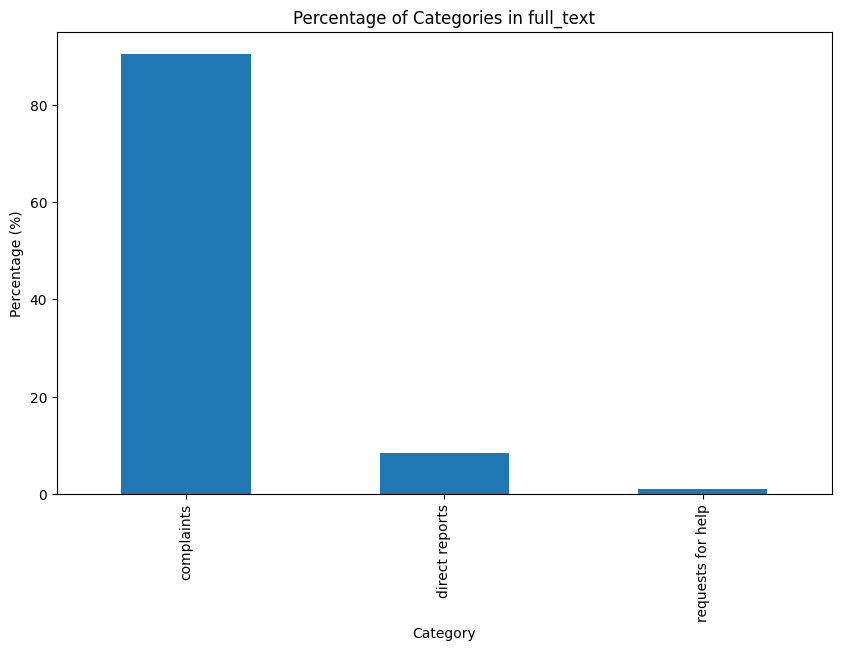

ModelError: Director: unexpected error handling prediction (E9243)

In [ ]:
agent.invoke({"input": "classify the following full_text into one of the following categories: direct reports, requests for help and complaints. visualize the percentage of each category in the form of a chart"})

In [ ]:
agent.invoke({"input": "provide a list of 5 full_texts along with their classifications that have the most retweets"})



> Entering new AgentExecutor chain...
Thought: To find the full_texts with the most retweets, I need to group the dataframe by 'full_text' and count the 'retweet_count' for each unique text. Then, I will sort these counts in descending order and select the top 5.

Action: python_repl_ast

Action Input: 
```python
most_retweeted = df.groupby('full_text')['retweet_count'].sum().nlargest(5).reset_index()
most_retweeted
```

                                           full_text  retweet_count
0                      jalanan kemang pratama banjir            117
1  banjir meluas puncak musim kemarau jabodetabek...            104
2  titik banjir pagi tangsel jalan aria putra cip...             75
3  live report infobanjirtng kondisi banjir ciled...             38
4  jakarta dikepung banjir pramono beruntung term...             36

ModelError: Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)

In [7]:
df["engagement_score"] = (
    df["favorite_count"]
    + df["reply_count"]
    + df["retweet_count"]
)

top_tweets = df.sort_values(
    by="engagement_score", ascending=False
).head(20)[[
    "full_text", "engagement_score", "favorite_count", "retweet_count", "reply_count"
]].reset_index(drop=True)

tweet_input = ""

for idx, row in top_tweets.iterrows():
    tweet_input += (
        f"Tweet {idx+1} (likes: {row['favorite_count']}, "
        f"retweets: {row['retweet_count']}, replies: {row['reply_count']}): "
        f"{row['full_text']}\n"
    )

prompt_prefix = """
You are an analyst examining the most viral tweets related to a natural disaster in Indonesia.
Classify the following full_text into their respective categories based on likes, retweet, and replies, using the hierarchy provided:

1. Type of Public Narrative (e.g., direct reports, help requests, emotional reactions, criticism, solidarity)
2. Common Topics or Issues Raised (e.g., evacuation, infrastructure, government response)
3. Geographic Focus (location mentioned or implied)
4. Engagement Insight (what kind of tweets go viral?)
5. Public Sentiment Summary (tone: hopeful, critical, urgent, emotional)

Tweets:
"""

final_prompt = prompt_prefix + tweet_input

In [ ]:
agent.invoke({"input": final_prompt })



> Entering new AgentExecutor chain...
Thought: To classify the tweets into the specified categories, I need to analyze each tweet's content, engagement metrics (likes, retweets, replies), and deduce the respective categories based on the provided hierarchy. I'll start with identifying the type of public narrative, common topics or issues raised, geographic focus, engagement insight, and public sentiment summary for each tweet.

Action: python_repl_ast

Action Input:
```python
import pandas as pd

tweets_data = {
    'full_text': [
        "jalanan kemang pratama banjir",
        "banjir meluas puncak musim kemarau jabodetabek dimitigasi pemerintah januari kebijakannya didasarkan pengetahuan ilmiah brin riset membangun tools prediksi",
        "titik banjir pagi tangsel jalan aria putra ciputat jalan jombang raya arah stasiun sudimara jalan setia budi pondok kacang pondok maharta pondok kacang prima jalan ceger raya taman mangu indah puri bintaro",
        "jakarta dikepung banjir pra

{'input': '\nYou are an analyst examining the most viral tweets related to a natural disaster in Indonesia.\nClassify the following full_text into their respective categories based on likes, retweet, and replies, using the hierarchy provided:\n\n1. Type of Public Narrative (e.g., direct reports, help requests, emotional reactions, criticism, solidarity)\n2. Common Topics or Issues Raised (e.g., evacuation, infrastructure, government response)\n3. Geographic Focus (location mentioned or implied)\n4. Engagement Insight (what kind of tweets go viral?)\n5. Public Sentiment Summary (tone: hopeful, critical, urgent, emotional)\n\nTweets:\nTweet 1 (likes: 743, retweets: 117, replies: 33): jalanan kemang pratama banjir\nTweet 2 (likes: 249, retweets: 104, replies: 3): banjir meluas puncak musim kemarau jabodetabek dimitigasi pemerintah januari kebijakannya didasarkan pengetahuan ilmiah brin riset membangun tools prediksi\nTweet 3 (likes: 242, retweets: 75, replies: 22): titik banjir pagi tangs

In [ ]:
df1 = pd.read_csv('/content/Data_Sentimen_bencana (1).csv')

df2 = pd.read_csv('/content/Data_Sentimen_bencana.csv')
collide_df = pd.concat([df1, df2])

with_image = collide_df[~collide_df["image_url"].isna()]
without_image = collide_df[collide_df["image_url"].isna()]

summary_stats = {
    "Jumlah tweet dengan gambar": len(with_image),
    "Jumlah tweet tanpa gambar": len(without_image),
    "Rata-rata likes (dengan gambar)": with_image["favorite_count"].mean(),
    "Rata-rata likes (tanpa gambar)": without_image["favorite_count"].mean(),
    "Rata-rata retweet (dengan gambar)": with_image["retweet_count"].mean(),
    "Rata-rata retweet (tanpa gambar)": without_image["retweet_count"].mean(),
    "Rata-rata reply (dengan gambar)": with_image["reply_count"].mean(),
    "Rata-rata reply (tanpa gambar)": without_image["reply_count"].mean(),
}

print(summary_stats)



{'Jumlah tweet dengan gambar': 184, 'Jumlah tweet tanpa gambar': 911, 'Rata-rata likes (dengan gambar)': np.float64(11.717391304347826), 'Rata-rata likes (tanpa gambar)': np.float64(2.163556531284303), 'Rata-rata retweet (dengan gambar)': np.float64(3.4402173913043477), 'Rata-rata retweet (tanpa gambar)': np.float64(0.54006586169045), 'Rata-rata reply (dengan gambar)': np.float64(1.5543478260869565), 'Rata-rata reply (tanpa gambar)': np.float64(0.47859495060373214)}


In [ ]:
response = agent.invoke({"input": """There are two groups of tweets about natural disasters:

- Tweets with images:
  - Count: 184
  - Avg Likes: 11.72
  - Avg Retweets: 3.44
  - Avg Replies: 1.55

- Tweets without images:
  - Count: 911
  - Avg Likes: 2.16
  - Avg Retweets: 0.54
  - Avg Replies: 0.48

Based on this comparison, briefly explain which type of tweet tends to get more public engagement and why that might be the case."""})
print(response)




> Entering new AgentExecutor chain...
Thought: To determine which type of tweet tends to get more public engagement, we need to compare the average number of likes, retweets, and replies for tweets with and without images. Engagement metrics such as likes, retweets, and replies indicate how much interaction a tweet receives.

From the given data:

- Tweets with images: 
  - Count: 184
  - Avg Likes: 11.72
  - Avg Retweets: 3.44
  - Avg Replies: 1.55

- Tweets without images:
  - Count: 911
  - Avg Likes: 2.16
  - Avg Retweets: 0.54
  - Avg Replies: 0.48

Tweets with images have significantly higher average engagement metrics (likes, retweets, replies) compared to those without images. This suggests that tweets containing images tend to receive more public engagement.

Images can capture attention more effectively than text alone. They provide visual context and can evoke emotional responses, making the content more shareable and likely to be retweeted or replied to. Furthermore, imag



> Entering new AgentExecutor chain...


<string>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.


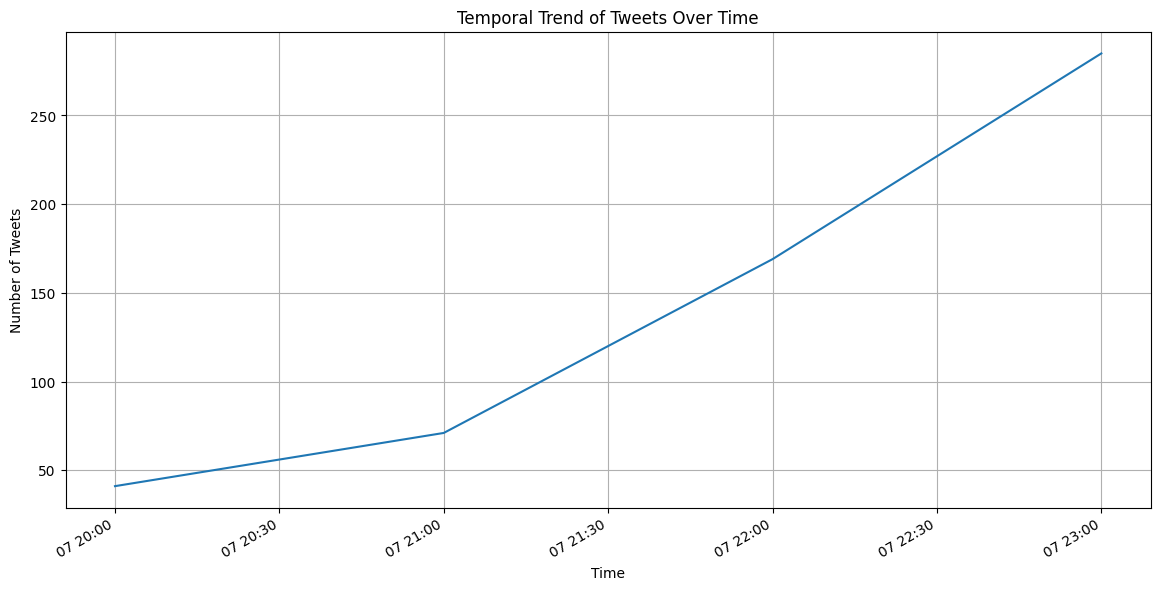

Thought: To analyze the temporal trend of public response to a disaster event, I need to examine the 'created_at' column to see the distribution of tweets over time. I will group the data by hour or day and count the number of tweets. Then, I will identify spikes in the tweet volume, estimate the time window of peak activity, and speculate on potential causes for these spikes based on the context provided.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'created_at' to datetime if not already
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by hour and count tweets
hourly_tweet_counts = df.set_index('created_at').resample('H').size()

# Alternatively, group by day if needed
# daily_tweet_counts = df.set_index('created_at').resample('D').size()

# Plot the hourly tweet counts
plt.figure(figsize=(14, 7))
plt.plot(hourly_tweet_counts.index, hourly_tweet_counts.values)
plt.title('Temporal Trend of Tweets Over Time

ModelError: Director: unexpected error handling prediction (E9243)

In [ ]:
result = agent.invoke({"input" : """
Analyze the temporal trend of public response to a disaster event based on tweet volume over time in cerated_at column.

You are given tweet counts distributed either per day or per hour.

Your task:
1. Identify any spikes or significant increases in tweet volume.
2. Estimate the time window of peak activity.
3. Explain what might have caused these spikes (e.g. breaking news, aftershocks, government announcements).
4. Suggest how this timing insight can help disaster response or communication planning.

Summarize your findings in a line chart.

"""})
print(result)

In [22]:
df["engagement_score"] = (
    df["favorite_count"]
    + df["reply_count"]
    + df["retweet_count"]
)

top_20_tweets = df.sort_values(
    by="engagement_score", ascending=False
).head(50)[[
    "full_text", "engagement_score"]].reset_index(drop=True)


prompt_prefix_2 = """
Summarize the following tweet, focusing on the main complaint and no more than three key points.
"""

final_prompt_2 = prompt_prefix_2 + "\n".join(top_20_tweets["full_text"])
prompt = f"""{final_prompt_2}"""
output = llm.invoke(prompt)
print(output)

This tweet thread details the extensive flooding in Jakarta and Jabodetabek, exacerbated by the rainy season's peak. Key points include:

1. **Government's Handling**: The main complaint revolves around the government's management of the floods, criticizing its response as inadequate. The floods occurred despite scientific knowledge and predictive tools available.

2. **Affected Areas**: Specific streets and neighborhoods like Aria Putra, Ciputat, Setia Budi, Pondok Kacang, and Maharta are mentioned as severely inundated. Residents struggle with mobility, with vehicles unable to navigate flooded roads.

3. **Criticism of Local Leadership**: There's criticism directed at the governor, Anies Baswedan, accusing him of mishandling the situation, likening his governance during floods to that of an outdated era. The thread also references past flood events, suggesting a pattern of ineffective response under current leadership.

Additional comments express frustration, highlight the lack of o

In [8]:
df_classified = df[["full_text"]].copy()
df_classified["sentiment"] = ""

for idx, row in df_classified.iterrows():
    prompt = f"""
Classify the sentiment of the following Indonesian tweet related to natural disasters.

Tweet: {row['full_text']}

Return only one line in this format:
Sentiment: Positive, Negative, or Neutral
"""
    try:
        output = llm.invoke(prompt)
        print()
        print("Output:")
        print(output)
        print("----------------------------------------------")
        df_classified.at[idx, "sentiment"] = output.strip()
    except Exception as e:
        df_classified.at[idx, "sentiment"] = "ERROR"
        print(f"Error on index {idx}: {e}")



Output:
Sentiment: Neutral
----------------------------------------------

Output:
Sentiment: Negative

Explanation: The Indonesian tweet "giaajkt kena banjir dek" translates to "experienced flooding" in English, which indicates a negative sentiment related to facing a natural disaster.
----------------------------------------------

Output:
Sentiment: Negative

Explanation: The tweet expresses distress over a flood situation in Pamulang, accompanied by personal concerns about a property purchase, indicating a negative sentiment due to the worrisome context of the natural disaster.
----------------------------------------------

Output:
Sentiment: Negative

Explanation: The tweet translates to "Like the pink item, mom, during the flood." The use of the word "banjir" (flood) indicates a negative situation, and the sentiment expresses disapproval or concern regarding the flood, rather than a positive one. The mention of a "pink item" seems to be a reference to something unrelated or a c

In [9]:
import re

def clean_sentiment(text):

    match = re.search(r'\b(positive|negative|neutral)\b', str(text), re.IGNORECASE)
    if match:
        return match.group(1).capitalize()
    else:
        return 'Unknown'

df_classified['sentiment_label'] = df_classified['sentiment'].apply(clean_sentiment)
df_classified.drop(['sentiment'], axis=1, inplace=True)
df_classified

,full_text,sentiment_label
0,kalo banjir dimana gini bawa kendaraan listrik...,Neutral
1,giaajkt kena banjir dek,Negative
2,huaaa kabar pamulang udah banjir kabar gue bel...,Negative
3,suka pink item mas banjir,Negative
4,selasa pagi banjir yaa room bareng nuna aja yu...,Negative
...,...,...
561,sshin wkwk samaa gw jga pas diluar yg kocag pa...,Negative
562,fwbjakarta kau cari tinggal bebas banjir,Negative
563,nguping mall ngapain sih bangga anak jaksel ja...,Negative
564,twoister banjir semalem,Negative


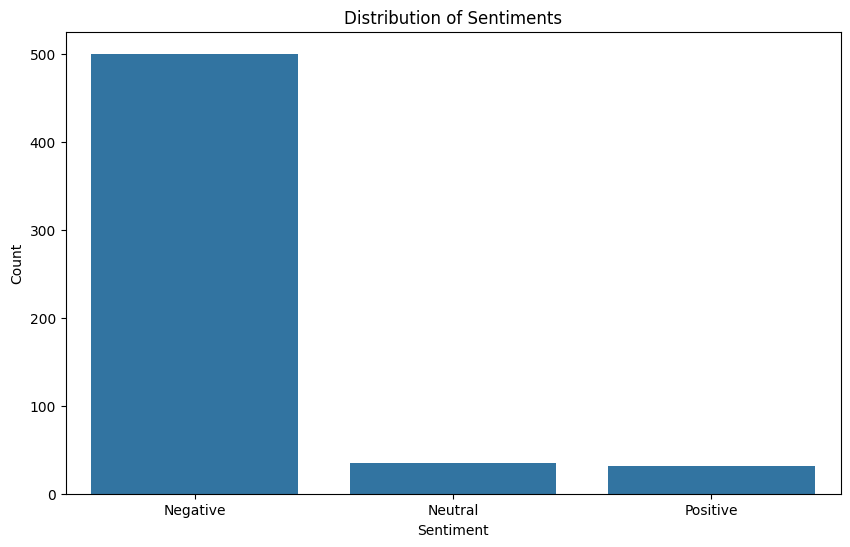

In [12]:
sentiment_count = df_classified['sentiment_label'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x="sentiment_label", data=df_classified, order=sentiment_count.index)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [13]:
for idx, row in df_classified.iterrows():
    prompt = f"""
classify the following tweet into one of the following categories: direct reports, requests for help and complaints.

Tweet: {row['full_text']}

Return only one line in this format:
Categories: direct reports, requests for help, or complaints
"""
    try:
        output = llm.invoke(prompt)
        print()
        print("Output:")
        print(output)
        print("----------------------------------------------")
        df_classified.at[idx, "classified"] = output.strip()
    except Exception as e:
        df_classified.at[idx, "classified"] = "ERROR"
        print(f"Error on index {idx}: {e}")


Output:
Categories: direct reports

Explanation: The tweet describes a suggestion or instruction regarding how to handle a flood situation, specifically mentioning the use of electric vehicles. It does not express a need for help or express dissatisfaction, so it falls under the "direct reports" category.
----------------------------------------------

Output:
Categories: complaints

Explanation: The provided tweet appears to be in a coded or abbreviated form, making it difficult to understand the context fully. However, based on the presence of the word "banjir" which translates to "flood" in English, it seems to express a complaint or concern about a flood situation. Without further context or clarification, this tweet is classified as a complaint.
----------------------------------------------

Output:
Categories: complaints
----------------------------------------------

Output:
Categories: complaints

This tweet appears to be a complaint. The phrase "suka pink item mas banjir" tr

In [14]:

def clean_label(text):
    pattern = r'\b(direct reports|requests for help|complaints)\b'
    match = re.search(pattern, str(text), re.IGNORECASE)
    if match:
        return match.group(1).lower()
    else:
        return 'unknown'
df_classified['classified_label'] = df_classified['classified'].apply(clean_label)
df_classified.drop(['classified'], axis=1, inplace=True)

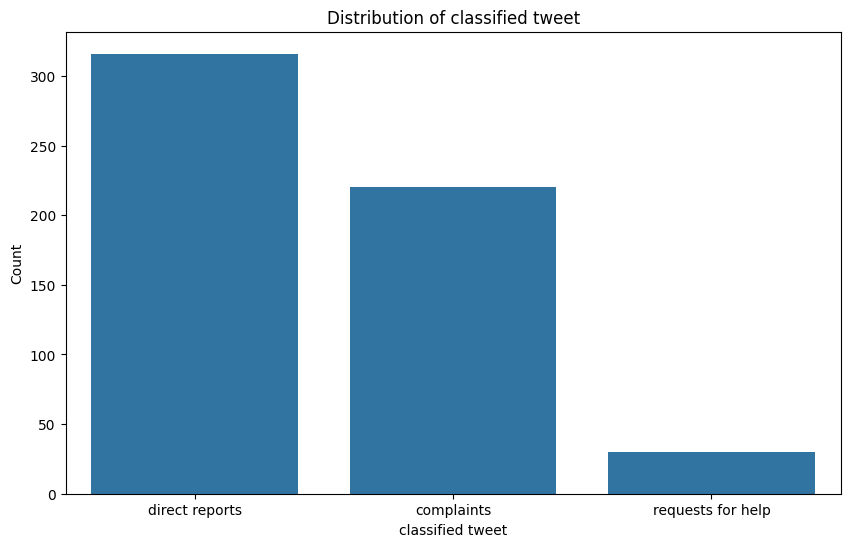

In [15]:
sentiment_count = df_classified['classified_label'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x="classified_label", data=df_classified, order=sentiment_count.index)
plt.title("Distribution of classified tweet")
plt.xlabel("classified tweet")
plt.ylabel("Count")
plt.show()

In [16]:

df_subset = df[["engagement_score"]]
df_combined = pd.concat([df_classified, df_subset], axis=1)
df_combined


,full_text,sentiment_label,classified_label,engagement_score
0,kalo banjir dimana gini bawa kendaraan listrik...,Neutral,direct reports,0
1,giaajkt kena banjir dek,Negative,complaints,0
2,huaaa kabar pamulang udah banjir kabar gue bel...,Negative,complaints,0
3,suka pink item mas banjir,Negative,complaints,4
4,selasa pagi banjir yaa room bareng nuna aja yu...,Negative,complaints,18
...,...,...,...,...
561,sshin wkwk samaa gw jga pas diluar yg kocag pa...,Negative,complaints,1
562,fwbjakarta kau cari tinggal bebas banjir,Negative,complaints,0
563,nguping mall ngapain sih bangga anak jaksel ja...,Negative,complaints,4
564,twoister banjir semalem,Negative,direct reports,1


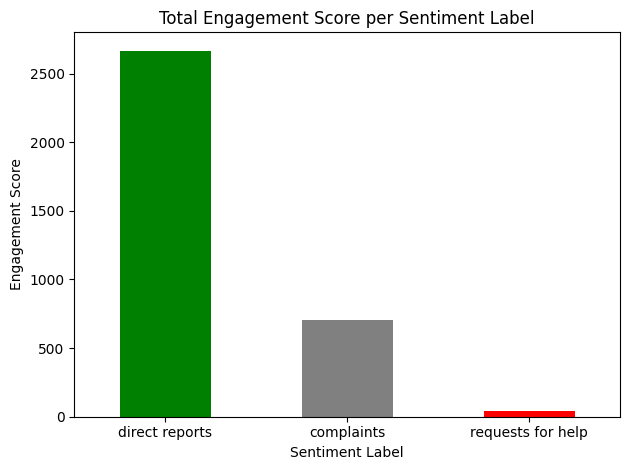

In [19]:
# Hitung total engagement per label
sorted_engagement = df_combined.groupby('classified_label')['engagement_score'].sum().sort_values(ascending=False)
sorted_engagement.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Total Engagement Score per Sentiment Label")
plt.ylabel("Engagement Score")
plt.xlabel("Sentiment Label")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
